In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dateutil
import datetime

In [2]:
data = pd.read_csv("Food_Inspections.csv")

In [3]:
#Select records with Pass or Fail results and groupby Risk category and Results
data['year'] = pd.DatetimeIndex(data['Inspection Date']).year
df1 = data.loc[data['Results'].isin(['Fail', 'Pass','Pass w/ Conditions']) & data['Risk'].isin(['Risk 3 (Low)', 'Risk 2 (Medium)', 'Risk 1 (High)'])]
df2 = df1.iloc[:, [5,12]]
df2 = df2.groupby(['Risk', 'Results']).size().reset_index(name = 'Counts')
df2

,Risk,Results,Counts
0,Risk 1 (High),Fail,26657
1,Risk 1 (High),Pass,77709
2,Risk 1 (High),Pass w/ Conditions,20891
3,Risk 2 (Medium),Fail,7335
4,Risk 2 (Medium),Pass,20493
5,Risk 2 (Medium),Pass w/ Conditions,5056
6,Risk 3 (Low),Fail,3729
7,Risk 3 (Low),Pass,7370
8,Risk 3 (Low),Pass w/ Conditions,901


In [4]:
#Calculate inspection passing rate in each Risk category
df2['ratio'] = df2['Counts'] / df2.groupby('Risk')['Counts'].transform('sum')
df2 = df2.loc[df2['Results'].isin(['Pass','Pass w/ Conditions'])]
df2 = df2.groupby('Risk')['ratio'].agg('sum')
df2

Risk
Risk 1 (High)      0.787182
Risk 2 (Medium)    0.776943
Risk 3 (Low)       0.689250
Name: ratio, dtype: float64

Text(0.5, 0, '')

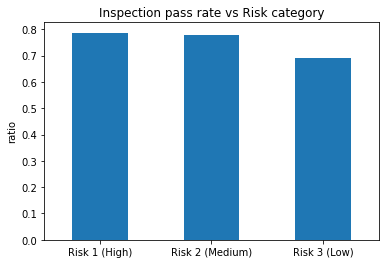

In [5]:
df2.plot.bar(x='Risk', y='ratio', rot=0, legend=False)
plt.title('Inspection pass rate vs Risk category')
plt.ylabel('ratio')
plt.xlabel('')

In [6]:
#Calculate inspection passing rate in each Risk category in each year (2010-2019)
df3 = df1.iloc[:, [5,12,17]]
df3 = df3.groupby(['Risk', 'Results','year']).size().reset_index(name = 'Counts')
df3['ratio'] = df3['Counts']/ df3.groupby(['Risk', 'year'])['Counts'].transform('sum')
df3 = df3.sort_values(by =['year', 'Risk'])

In [7]:
df3 = df3.loc[df3['Results'].isin(['Pass','Pass w/ Conditions'])]
df3 = df3.groupby(['Risk','year'])['ratio'].sum().reset_index()
df3

,Risk,year,ratio
0,Risk 1 (High),2010,0.760676
1,Risk 1 (High),2011,0.774819
2,Risk 1 (High),2012,0.787238
3,Risk 1 (High),2013,0.815924
4,Risk 1 (High),2014,0.805576
5,Risk 1 (High),2015,0.799940
6,Risk 1 (High),2016,0.787572
7,Risk 1 (High),2017,0.779388
8,Risk 1 (High),2018,0.779631
9,Risk 1 (High),2019,0.774367


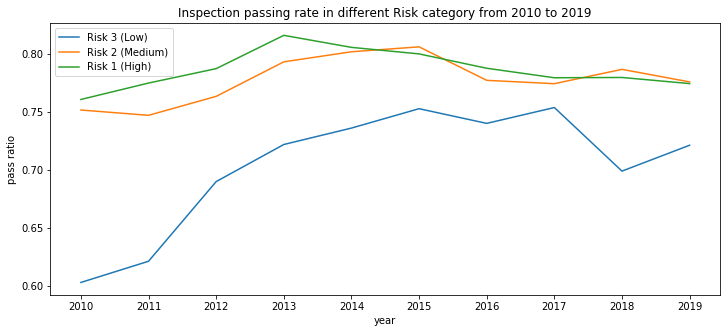

In [8]:
fig, ax = plt.subplots(figsize = (12,5))
for risk in ['Risk 3 (Low)', 'Risk 2 (Medium)', 'Risk 1 (High)']:
    ax.plot(df3[df3['Risk']==risk].year, df3[df3['Risk']==risk].ratio, label=risk)
ax.set_xlabel("year")
ax.xaxis.set_ticks(np.arange(2010, 2020, 1))
ax.set_ylabel("pass ratio")
ax.legend(loc='best')
ax.title.set_text("Inspection passing rate in different Risk category from 2010 to 2019")